## Question-1

Using the data in `'churn.csv'`:

a- Select the following columns: <br>
        ``['gender','InternetService','Contract','MonthlyCharges','PhoneService','StreamingTV','Churn','Age']``


In [117]:
# Your code here
#!pip install pandas
import pandas as pd
df = pd.read_csv('./churn.csv')
df = df[['gender','InternetService','Contract','MonthlyCharges','PhoneService','StreamingTV','Churn','Age']]

b- Keep only those have phoneService with StreamingTV (be sure to reset the index and remove any additional column). 


In [118]:
# Your code here
df = df[(df['PhoneService'] == 'Yes') & (df['StreamingTV'] == 'Yes')]
df.reset_index(inplace = True)
df.drop(columns=['index'], inplace=True)

## Question-2

a- Find which contract type has the largest number of churn 


In [119]:
# Your code here
df[['Contract', 'Churn']].groupby('Contract').count().idxmax()[0]

'Month-to-month'

b- What is the average monthly charge of Fiber optic client who pay Month-to-month? is there any difference between males vs females?


In [120]:
# Your code here
print("Average Monthly Charge: " + str(df[(df.InternetService == 'Fiber optic') & (df.Contract == 'Month-to-month')][["MonthlyCharges"]].mean()[0]))
df[(df.InternetService == 'Fiber optic') & (df.Contract == 'Month-to-month')][['gender', 'MonthlyCharges']].groupby('gender').mean()

Average Monthly Charge: 95.5891


,MonthlyCharges
gender,
Female,95.376876
Male,95.795464


c- Find the number of Female vs male in each contract type

In [121]:
# Your code here
print("Males \n" + str(df[df.gender == 'Male'][['gender', 'Contract']].groupby('Contract').count()) + "\n")
print("Females \n" + str(df[df.gender == 'Female'][['gender', 'Contract']].groupby('Contract').count()))

Males 
                gender
Contract              
Month-to-month     598
One year           283
Two year           326

Females 
                gender
Contract              
Month-to-month     580
One year           299
Two year           336


d- How many Churn males vs females in each contract type? (then visualize the results)

Male 
                gender
Contract              
Month-to-month     304
One year            56
Two year            20

Female 
                gender
Contract              
Month-to-month     300
One year            56
Two year            14


Text(0.5, 1.0, 'Churn Males and Females')

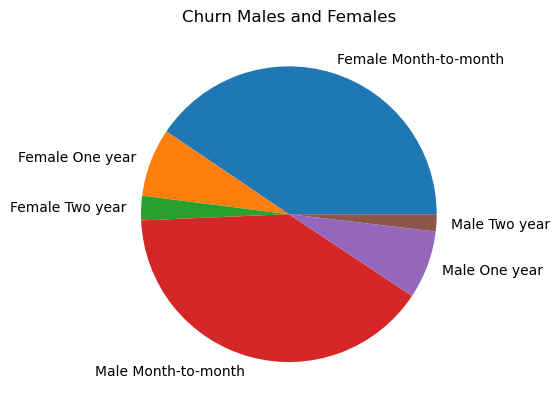

In [122]:
# Your code here
import matplotlib.pyplot as plt
male = df[(df.gender == 'Male') & (df.Churn == 'Yes')][['Contract', 'gender']].groupby('Contract').count()
female = df[(df.gender == 'Female') & (df.Churn == 'Yes')][['Contract', 'gender']].groupby('Contract').count()
print("Male \n" + str(male) + "\n")
print("Female \n" + str(female))
male = pd.concat([male, female])
plt.pie(male['gender'], labels=['Female Month-to-month', 'Female One year', 'Female Two year', 'Male Month-to-month', 'Male One year', 'Male Two year'])
plt.title("Churn Males and Females")

e- Determine the mean monthly Charges for each contract type  (then visualize the results)

                MonthlyCharges
Contract                      
Month-to-month       91.380263
One year             93.572938
Two year             95.677190


Text(0.5, 1.0, 'Mean Monthly Charges')

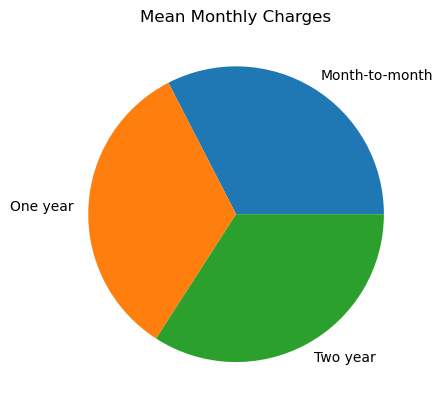

In [128]:
# Your code here
meanMonthlyCharges = df[['MonthlyCharges', 'Contract']].groupby('Contract').mean()
print(meanMonthlyCharges)
plt.pie(meanMonthlyCharges['MonthlyCharges'], labels=['Month-to-month', 'One year', 'Two year'])
plt.title('Mean Monthly Charges')

## Question-3

a- Compare the monthly charges of Churn vs non-Churn clients <br>
b- Compare the ages of Churn vs non-Churn clients  <br>

In [142]:
# Your code here
monthlyCharges = df[['MonthlyCharges', 'Churn']].groupby('Churn').mean()
monthlyCharges

,MonthlyCharges
Churn,
No,92.58131
Yes,94.19700


In [143]:
# Your code here
age = df[['Age', 'Churn']].groupby('Churn').mean()
age

,Age
Churn,
No,45.692584
Yes,45.870667


c- Show the histograms of Age of different groups (Churn vs non-Churn clients) and compare between them (do you think that Age is an important factor to churn?)

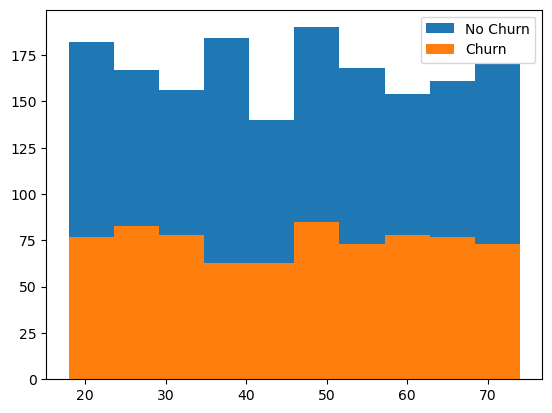

I do not think age is an important factor to churn, as the distributions seem more or less the same for both the churn and no churn plots.


In [167]:
# Your code here
noChurn = df[df.Churn == 'No'][["Age"]]
yesChurn = df[df.Churn == 'Yes'][["Age"]]
plt.hist(noChurn, bins=10, label="No Churn")
plt.hist(yesChurn, bins=10, label="Churn")
plt.legend(loc="upper right")
plt.show()
print("I do not think age is an important factor to churn, as the churn histogram remains relatively the same on the y axis. Between the histograms, the no churn histogram reaches much higher on the y axis than the churn histogram")

d- For each Internet Service category determine the mean monthly Charges of Churn vs non-Churn clients.<br>


In [138]:
# Your code here
df[['InternetService', 'MonthlyCharges', 'Churn']].groupby(['InternetService', 'Churn']).mean()

MonthlyCharges
InternetService Churn                
DSL             No          77.021264
                Yes         69.581746
Fiber optic     No         101.495767
                Yes         96.454294

e- Show the histograms of MonthlyCharges of Fiber optic users for different groups (Churn vs non-Churn clients) and compare between them (is there a big difference? i.e do you think that MonthlyCharges is an important factor to churn?)

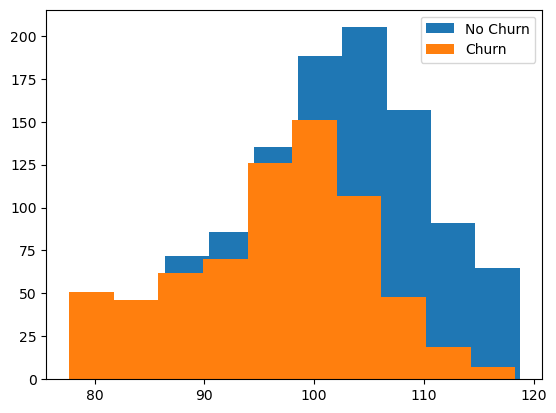

I do think that monthly charges for fiber optic users is an important factor to Churn, as when monthly charges increases, churn also increases. There is a slight difference between both histograms, but they rise and fall on the y axis at similar points on the x axis.


In [177]:
# Your code here
noChurn = df[(df.Churn == 'No') & (df.InternetService == 'Fiber optic')]['MonthlyCharges']
yesChurn = df[(df.Churn == 'Yes') & (df.InternetService == 'Fiber optic')]['MonthlyCharges']
plt.hist(noChurn, bins=10, label="No Churn")
plt.hist(yesChurn, bins=10, label="Churn")
plt.legend(loc="upper right")
plt.show()
print("I do think that monthly charges for fiber optic users is an important factor to Churn, as when monthly charges increases, churn also increases. There is a slight difference between both histograms, but they rise and fall on the y axis at similar points on the x axis.")

f- Show the histograms of MonthlyCharges of DSL users for different groups (Churn vs non-Churn clients) and compare between them (is there a big difference? i.e do you think that MonthlyCharges is an important factor to churn?)

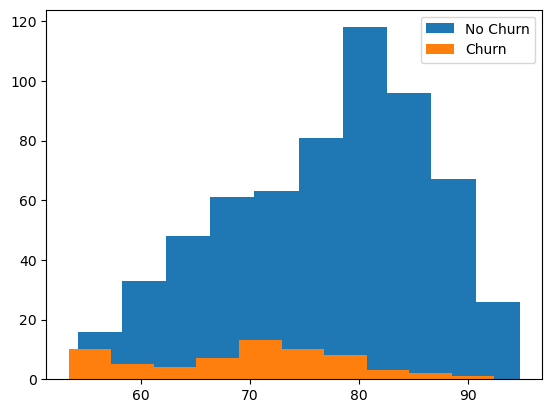

I do not think that MonthlyCharges of DSL users is an important to factor to churn, as the height of the churn histogram remains relatively the same regardless of monthly charge. Also, there is a big difference between both histograms, as the no churn histogram rises much higher on the y axis.


In [174]:
# Your code here
noChurn = df[(df.Churn == 'No') & (df.InternetService == 'DSL')]['MonthlyCharges']
yesChurn = df[(df.Churn == 'Yes') & (df.InternetService == 'DSL')]['MonthlyCharges']
plt.hist(noChurn, bins=10, label="No Churn")
plt.hist(yesChurn, bins=10, label="Churn")
plt.legend(loc="upper right")
plt.show()
print("I do not think that MonthlyCharges of DSL users is an important to factor to churn, as the height of the churn histogram remains relatively the same regardless of monthly charge. Also, there is a big difference between both histograms, as the no churn histogram rises much higher on the y axis.")